In [ ]:
pip install opencv-python

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [ ]:
pip install pydot

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
from tensorflow.keras.utils import plot_model

In [3]:
import cv2
import os

In [4]:
import os
from PIL import Image  

In [5]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from pathlib import Path

In [110]:
DATADIR = Path("C:\\Users\\pocot\\PycharmProjects\\WIDZENIE+PROJEKT\\KLASY")

In [111]:
X, y = [], []
for dir in DATADIR.iterdir():
    for file in dir.iterdir():
        img = cv2.imread(str(file))
        X.append(img)
        y.append(dir.name)

X = np.array(X)
y = np.array(y).reshape(-1, 1)
X.shape, y.shape

((706, 100, 100, 3), (706, 1))

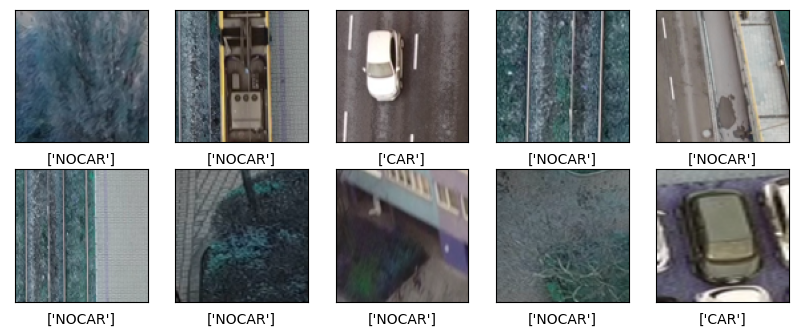

In [112]:
# plot first 10 images
plt.figure(figsize=(10, 10))
for i in range(10):
    num = np.random.randint(0, len(X))
    plt.subplot(5, 5, i+1)
    plt.imshow(X[num])
    plt.xlabel(y[num])
    plt.xticks([])
    plt.yticks([])
plt.show()


In [113]:
# one-hot encoding
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
if y.shape[1] == 1:
    y = le.fit_transform(y)
    y = to_categorical(y)
y.shape
# cast y to bool
y = y.astype(int)

C:\Users\pocot\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [114]:
# generate more data
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(

    rotation_range=90,
    zoom_range=0.1,
    vertical_flip=True,
    brightness_range=[1.5,2]
)

datagen.fit(X)


In [115]:
# Generate a batch of augmented data
for i in range(5):
    X_batch, y_batch = next(datagen.flow(X, y, shuffle=False, batch_size=440))
    X_batch = X_batch.astype(int)
    X = np.concatenate((X, X_batch))
    y = np.concatenate((y, y_batch))
X.shape, y.shape

((2906, 100, 100, 3), (2906, 2))

In [116]:
# split data into train and test
from sklearn.model_selection import train_test_split
X = X/255
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2324, 100, 100, 3), (582, 100, 100, 3), (2324, 2), (582, 2))

C:\Users\pocot\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


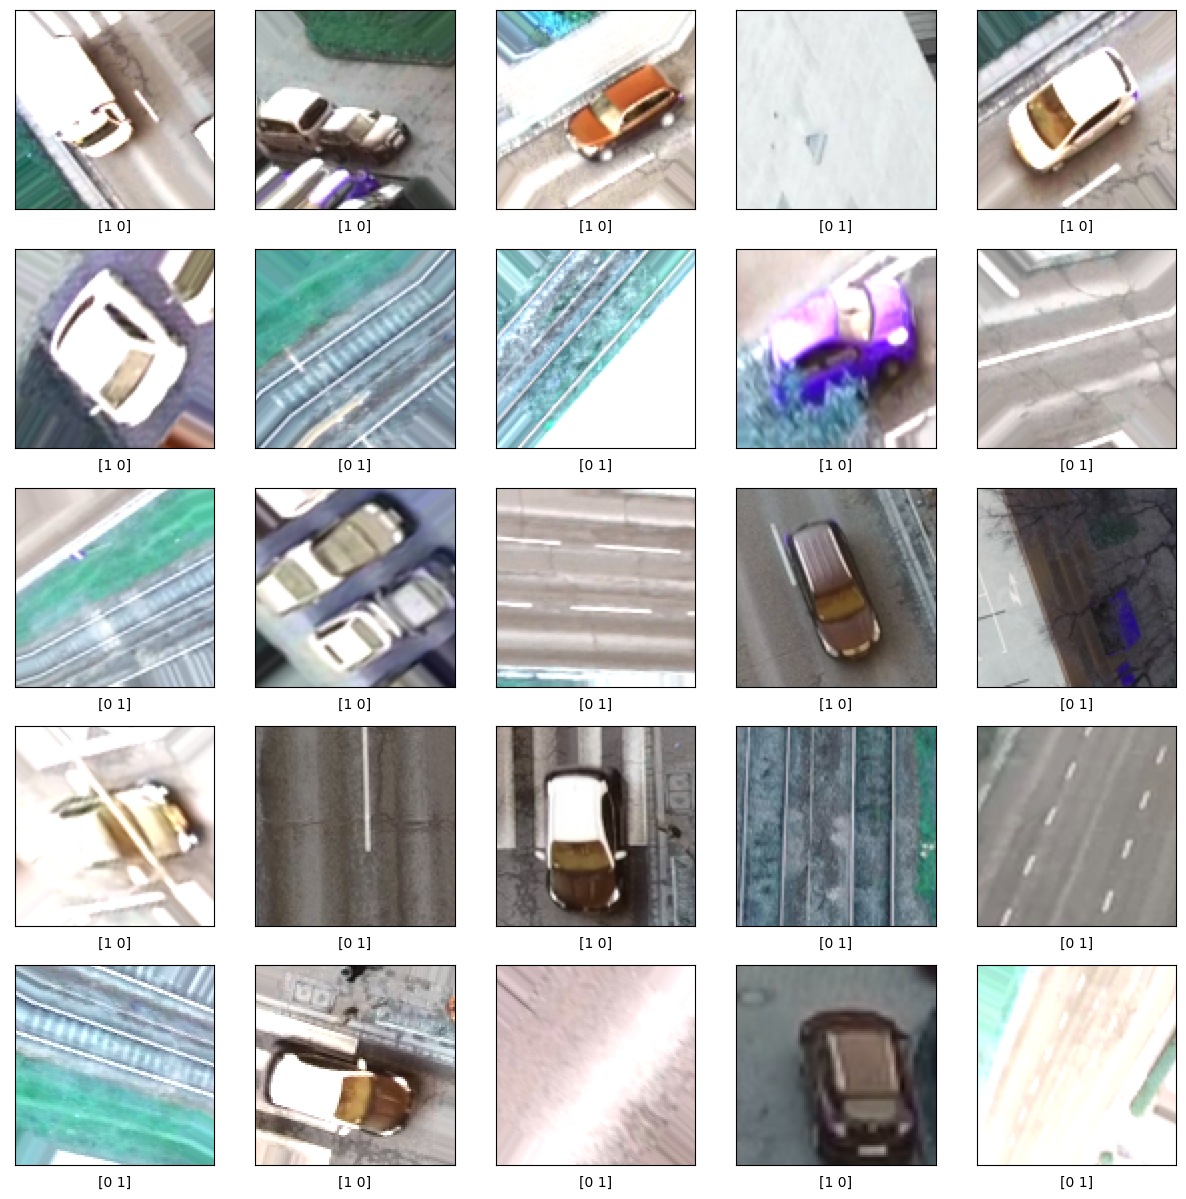

In [117]:
# plot first 25 images
plt.figure(figsize=(15, 15))
for i in range(25):
    num = np.random.randint(0, len(X))
    plt.subplot(5,5, i+1)
    plt.imshow(X[num])
    plt.xlabel(y[num])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [118]:
IMG_SIZE = X_test.shape[1]

In [119]:
# create model for output 2 classes
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax') 
])

# softmax

In [120]:
model.compile(optimizer='sgd',
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [121]:

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
73/73 [==============================] - 1s 8ms/step - loss: 0.7350 - accuracy: 0.5211 - val_loss: 0.6796 - val_accuracy: 0.6254
Epoch 2/100
73/73 [==============================] - 0s 6ms/step - loss: 0.6773 - accuracy: 0.5766 - val_loss: 0.6743 - val_accuracy: 0.5584
Epoch 3/100
73/73 [==============================] - 0s 6ms/step - loss: 0.6537 - accuracy: 0.6140 - val_loss: 0.6564 - val_accuracy: 0.5808
Epoch 4/100
73/73 [==============================] - 0s 6ms/step - loss: 0.6487 - accuracy: 0.6304 - val_loss: 0.5844 - val_accuracy: 0.7320
Epoch 5/100
73/73 [==============================] - 0s 6ms/step - loss: 0.6571 - accuracy: 0.6377 - val_loss: 0.5970 - val_accuracy: 0.7302
Epoch 6/100
73/73 [==============================] - 0s 7ms/step - loss: 0.6599 - accuracy: 0.6355 - val_loss: 0.6746 - val_accuracy: 0.5636
Epoch 7/100
73/73 [==============================] - 0s 6ms/step - loss: 0.6311 - accuracy: 0.6562 - val_loss: 0.6160 - val_accuracy: 0.6787
Epoch 8/100
7

Epoch 59/100
73/73 [==============================] - 0s 6ms/step - loss: 0.3361 - accuracy: 0.8468 - val_loss: 0.4428 - val_accuracy: 0.7887
Epoch 60/100
73/73 [==============================] - 0s 6ms/step - loss: 0.3363 - accuracy: 0.8567 - val_loss: 0.3713 - val_accuracy: 0.8471
Epoch 61/100
73/73 [==============================] - 0s 6ms/step - loss: 0.3163 - accuracy: 0.8657 - val_loss: 0.5198 - val_accuracy: 0.7715
Epoch 62/100
73/73 [==============================] - 0s 6ms/step - loss: 0.3236 - accuracy: 0.8524 - val_loss: 0.6221 - val_accuracy: 0.7216
Epoch 63/100
73/73 [==============================] - 0s 6ms/step - loss: 0.3137 - accuracy: 0.8546 - val_loss: 0.4594 - val_accuracy: 0.8024
Epoch 64/100
73/73 [==============================] - 0s 6ms/step - loss: 0.3215 - accuracy: 0.8533 - val_loss: 0.3787 - val_accuracy: 0.8385
Epoch 65/100
73/73 [==============================] - 0s 6ms/step - loss: 0.2858 - accuracy: 0.8817 - val_loss: 0.3738 - val_accuracy: 0.8505
Epoch 

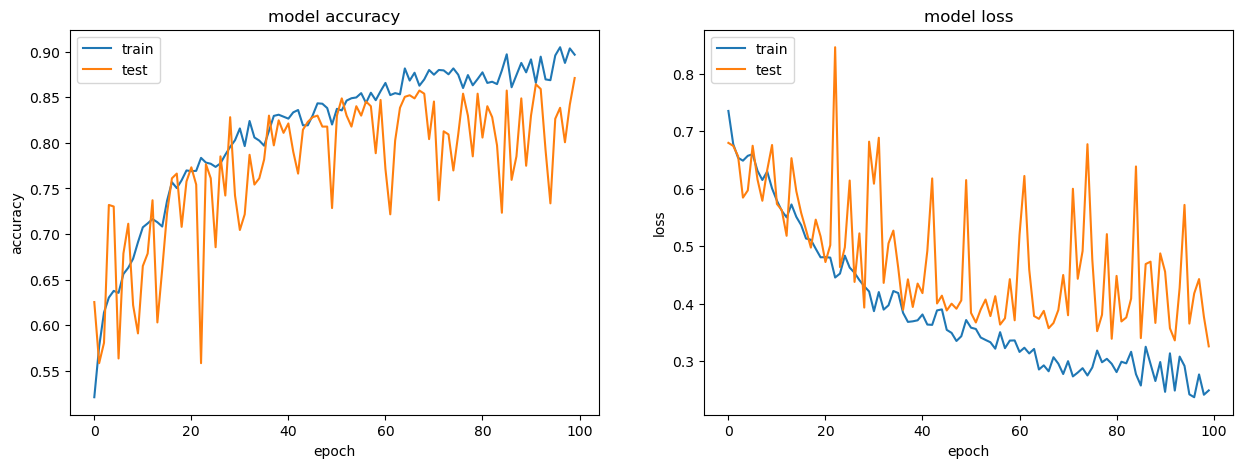

In [122]:
ax, fig = plt.subplots(1, 2, figsize=(15, 5))
fig[0].plot(history.history['accuracy'])
fig[0].plot(history.history['val_accuracy'])
fig[0].set_title('model accuracy')
fig[0].set_ylabel('accuracy')
fig[0].set_xlabel('epoch')
fig[0].legend(['train', 'test'], loc='upper left')
fig[1].plot(history.history['loss'])
fig[1].plot(history.history['val_loss'])
fig[1].set_title('model loss')
fig[1].set_ylabel('loss')
fig[1].set_xlabel('epoch')
fig[1].legend(['train', 'test'], loc='upper left')
plt.show()

19/19 [==============================] - 0s 1ms/step


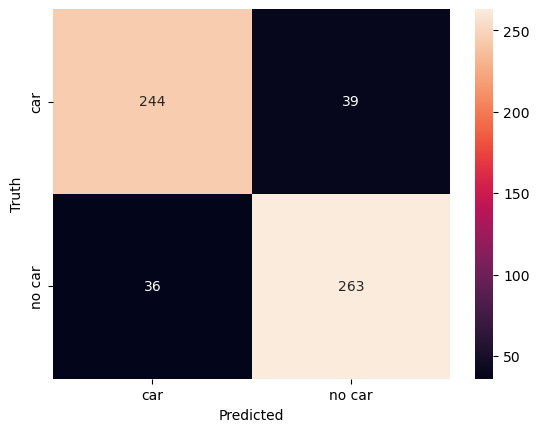

In [123]:
# macierz bledow
readable_values = ["car", "no car"]
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1) # to zwraca indeks najwiekszej wartosci w kazdym wierszu

new_y_pred = [readable_values[i] for i in y_pred]
new_y_test = [readable_values[i] for i in np.argmax(y_test, axis=1)]
cm = confusion_matrix(new_y_test, new_y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=readable_values, yticklabels=readable_values)

plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

73/73 [==============================] - 0s 1ms/step


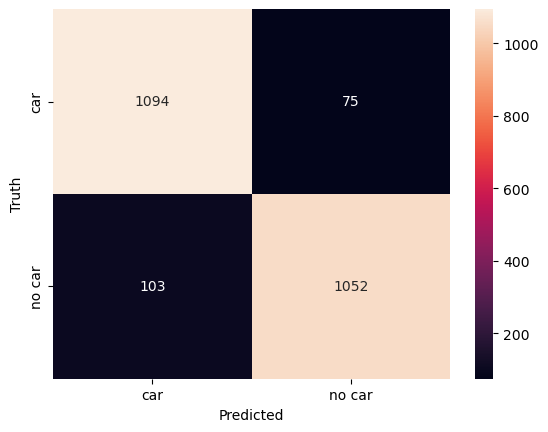

In [124]:
# macierz bledow #train
readable_values = ["car", "no car"]
y_pred = model.predict(X_train)
y_pred = np.argmax(y_pred, axis=1) # to zwraca indeks najwiekszej wartosci w kazdym wierszu

new_y_pred = [readable_values[i] for i in y_pred]
new_y_test = [readable_values[i] for i in np.argmax(y_train, axis=1)]
cm = confusion_matrix(new_y_test, new_y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=readable_values, yticklabels=readable_values)

plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

19/19 [==============================] - 0s 1ms/step


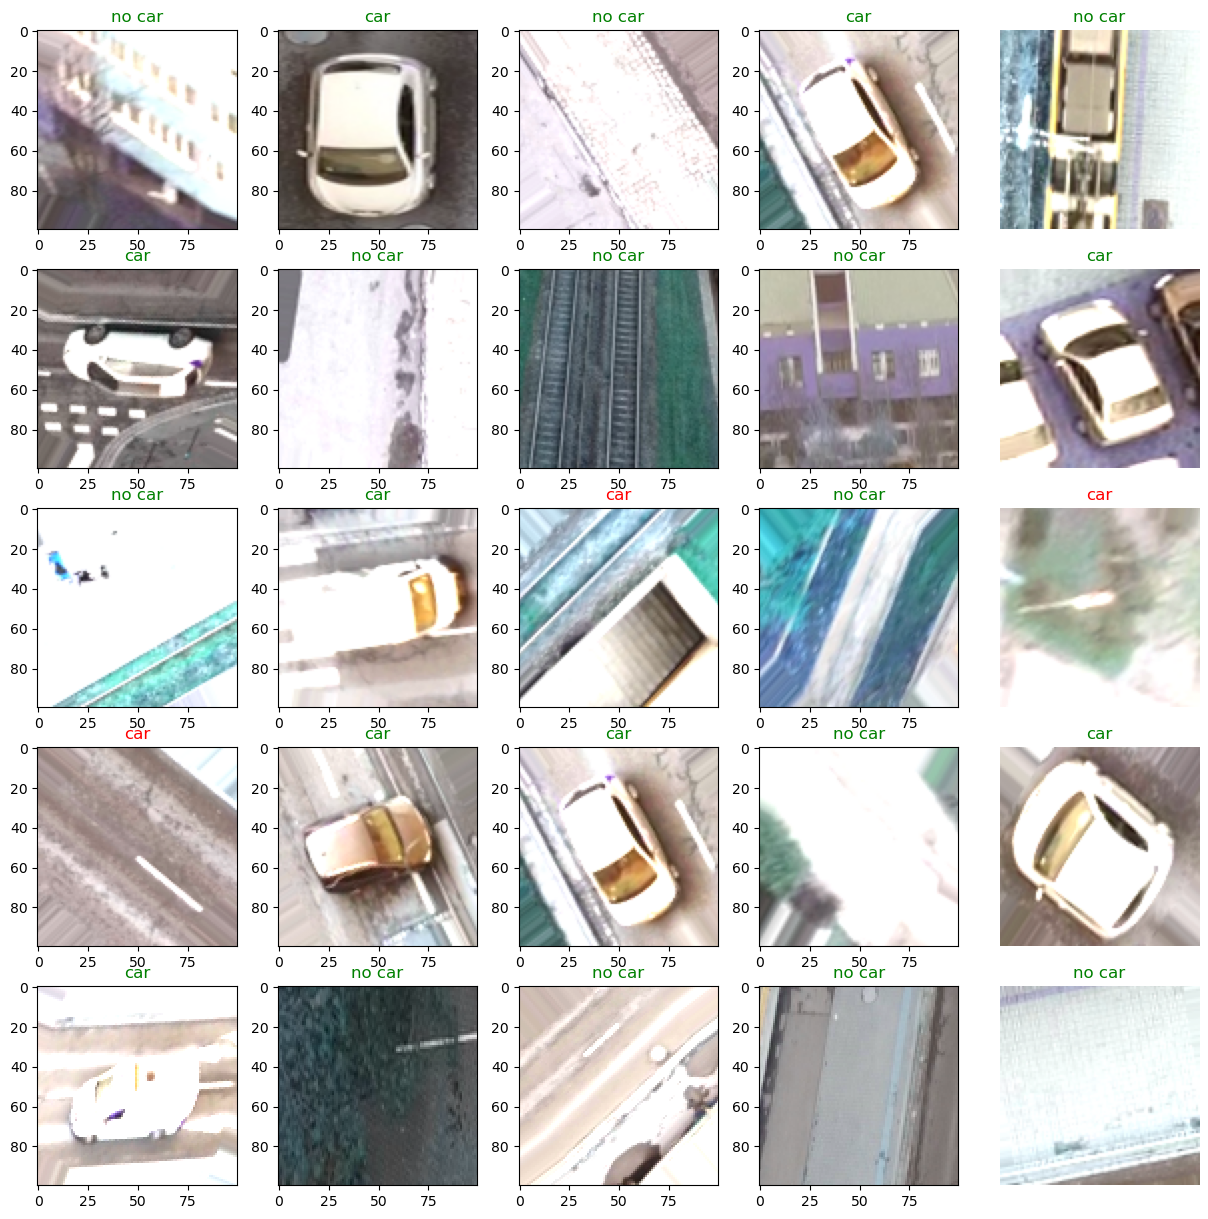

In [125]:
#testowanie
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
y_pred = model.predict(X_test)
for i in range(5):
    for j in range(5):
        num = np.random.randint(0, len(X_test))
        axes[i][j].imshow(X_test[num])
        pred = np.argmax(y_pred[num])
        true = np.argmax(y_test[num])
    
        if pred != true:
            axes[i][j].set_title(f'{readable_values[pred]}',  color='red')
        else:
            axes[i][j].set_title(f'{readable_values[pred]}',  color='green')
    axes[i][j].axis('off')

In [126]:
# save model to h5 format

model.save('projectdata_model_2.h5')

In [127]:
#NOWY ZBIÓR TESTOWY Z DOTA DATASET https://captain-whu.github.io/DOTA/dataset.html
#DOTA

#A Large-Scale Benchmark and Challenges for Object Detection in Aerial Images

In [128]:
data_dir = Path('test_DOTA_dataset').resolve()
IMG_SIZE = 100

In [129]:
X, y = [], []
for dir in data_dir.iterdir():
    for file in dir.iterdir():
        img = cv2.imread(str(file))
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img)
        y.append(dir.name)

X = np.array(X)
y = np.array(y).reshape(-1, 1)
X.shape, y.shape

((114, 100, 100, 3), (114, 1))

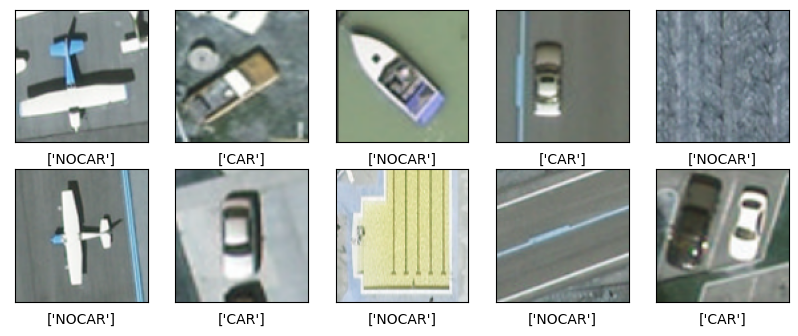

In [130]:
plt.figure(figsize=(10, 10))
for i in range(10):
    num = np.random.randint(0, len(X))
    plt.subplot(5, 5, i+1)
    plt.imshow(X[num])
    plt.xlabel(y[num])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [131]:
le = LabelEncoder()
if y.shape[1] == 1:
    y = le.fit_transform(y)
    y = to_categorical(y)
y.shape
# cast y to bool
y = y.astype(int)

C:\Users\pocot\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\pocot\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


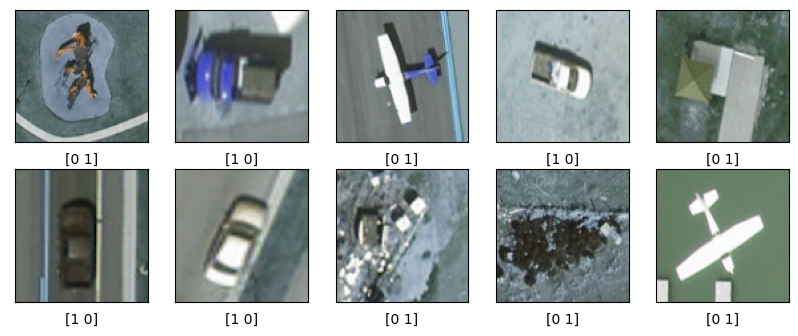

In [132]:
plt.figure(figsize=(10, 10))
for i in range(10):
    num = np.random.randint(0, len(X))
    plt.subplot(5, 5, i+1)
    plt.imshow(X[num])
    plt.xlabel(y[num])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [133]:
X.shape , y.shape

((114, 100, 100, 3), (114, 2))

4/4 [==============================] - 0s 2ms/step


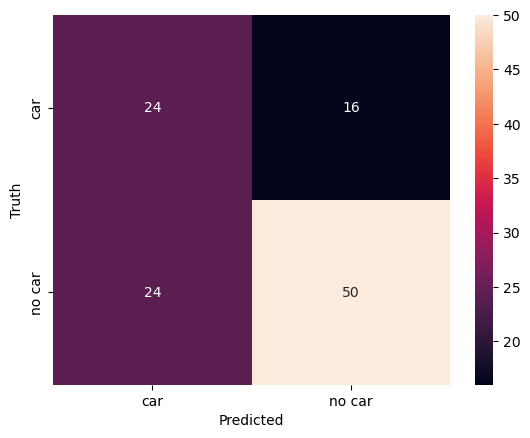

In [134]:
# macierz bledow
readable_values = ["car", "no car"]
y_pred_DOTA = model.predict(X)
y_pred_DOTA = np.argmax(y_pred_DOTA, axis=1) # to zwraca indeks najwiekszej wartosci w kazdym wierszu

new_y_pred_DOTA = [readable_values[i] for i in y_pred_DOTA]
new_y_test_DOTA = [readable_values[i] for i in np.argmax(y, axis=1)]
cm = confusion_matrix(new_y_test_DOTA, new_y_pred_DOTA)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=readable_values, yticklabels=readable_values)

plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

4/4 [==============================] - 0s 2ms/step


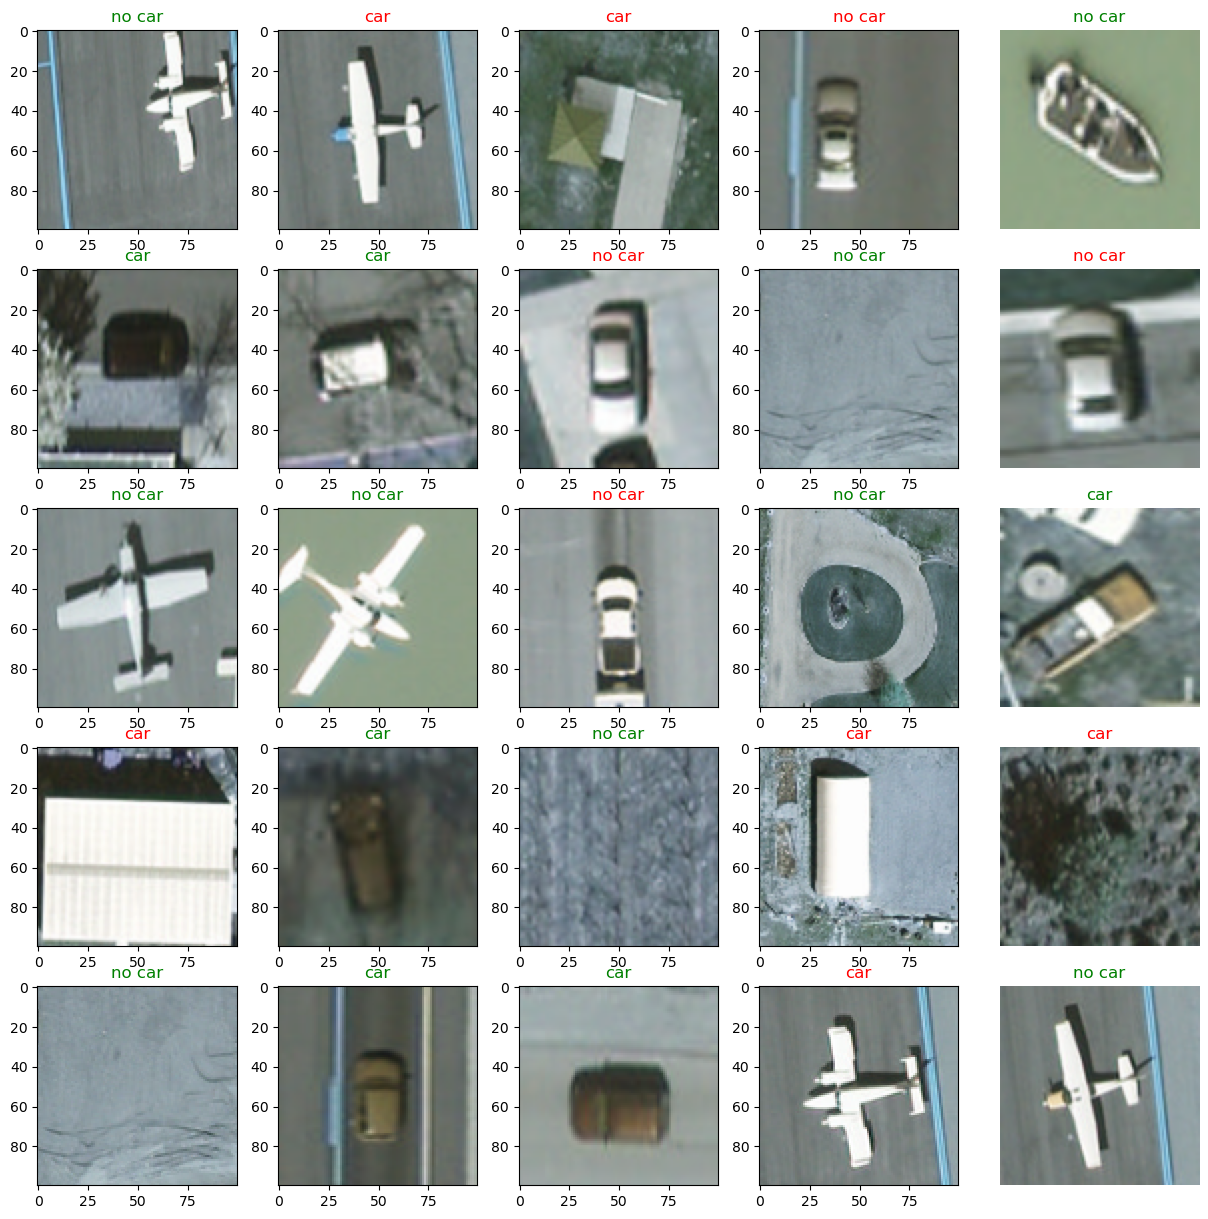

In [135]:
#testowanie
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
y_pred_DOTA = model.predict(X)
for i in range(5):
    for j in range(5):
        num = np.random.randint(0, len(X))
        axes[i][j].imshow(X[num])
        pred = np.argmax(y_pred_DOTA[num])
        true = np.argmax(y[num])
    
        if pred != true:
            axes[i][j].set_title(f'{readable_values[pred]}',  color='red')
        else:
            axes[i][j].set_title(f'{readable_values[pred]}',  color='green')
    axes[i][j].axis('off')

In [136]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 30000)             0         
                                                                 
 dense_20 (Dense)            (None, 128)               3840128   
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 2)                 66        
                                                                 
Total params: 3,850,530
Trainable params: 3,850,530
Non-trainable params: 0
_________________________________________________________________
